In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [2]:
data_file_name = "data.csv"
data = pd.read_csv(data_file_name)
X = np.array(data[['x1', 'x2']])
y = np.array(data['y'])


In [7]:
data.groupby('y')['x2'].mean()

y
-1.0   -0.131581
 1.0   -0.071957
Name: x2, dtype: float64

In [46]:
gbc = GradientBoostingClassifier()
logisticRegression = LogisticRegression()
svm = SVC(kernel='rbf', gamma=1000)

In [47]:
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,]
    Y2 = Y[permutation]
    return X2, Y2

In [48]:
X2, y2 = randomize(X,y)

In [49]:
def draw_learning_curves(X, y, estimator, num_trainings):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color='g',
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color='y',
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

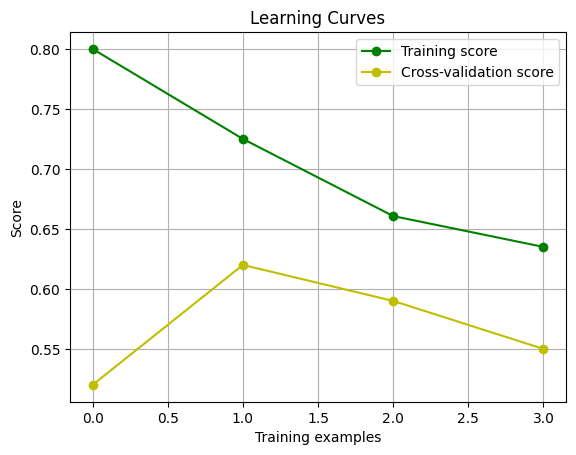

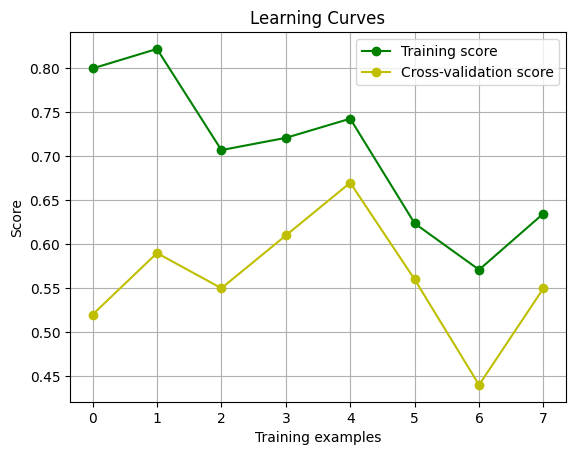

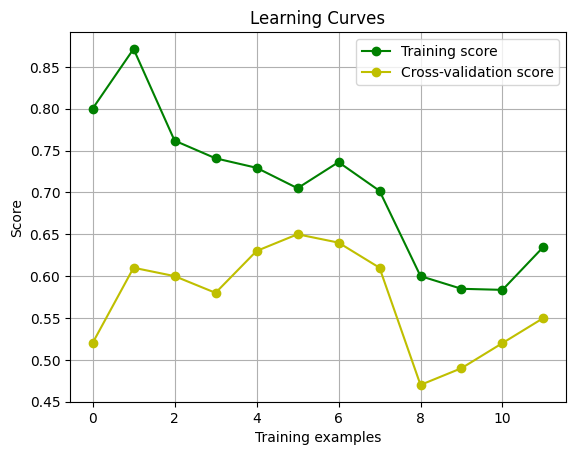

In [53]:
draw_learning_curves(X2, y2, logisticRegression, 4)
draw_learning_curves(X2, y2, logisticRegression, 8)
draw_learning_curves(X2, y2, logisticRegression, 12)


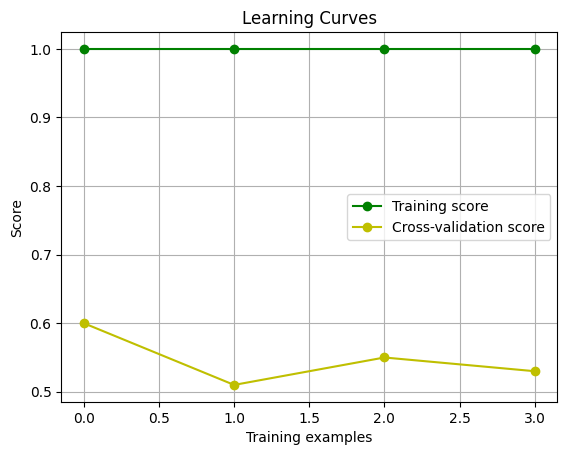

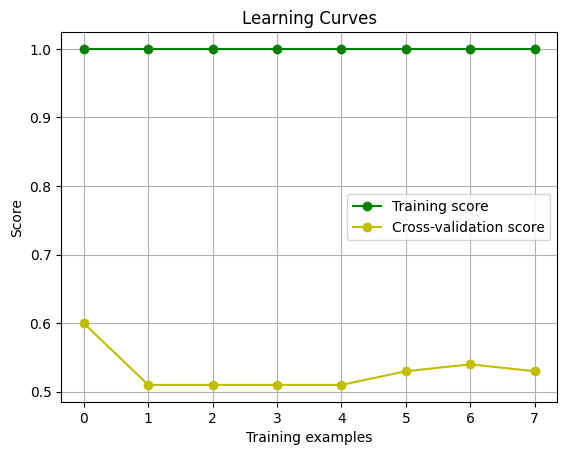

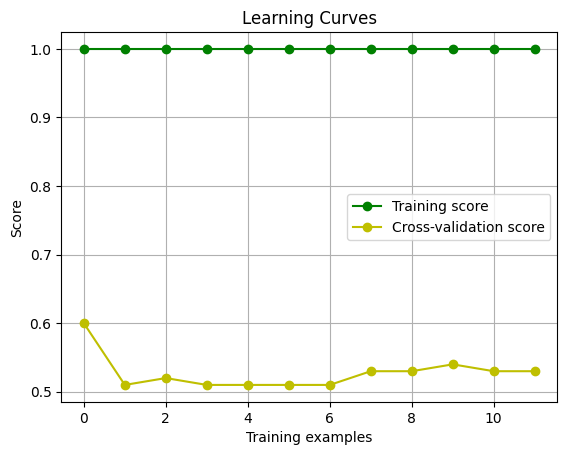

c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:1650: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 73 instead of 100.
  RuntimeWarning,


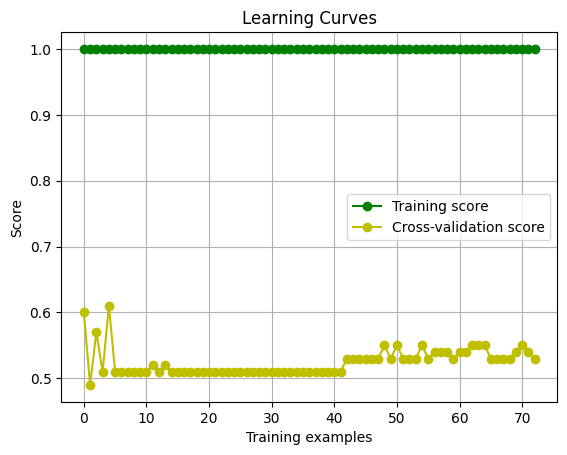

In [58]:
draw_learning_curves(X2, y2, svm,4)
draw_learning_curves(X2, y2, svm, 8)
draw_learning_curves(X2, y2, svm, 12)
draw_learning_curves(X2, y2, svm, len(X2))

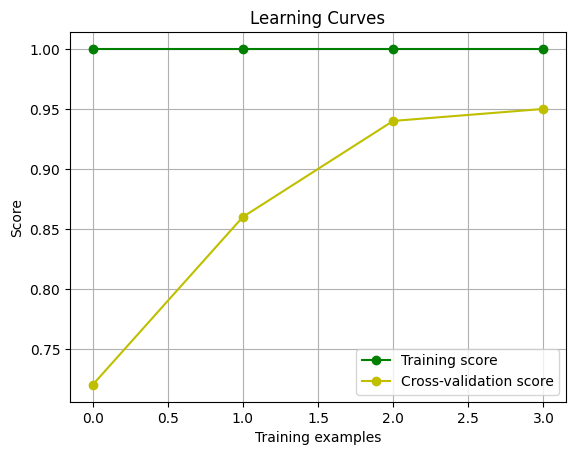

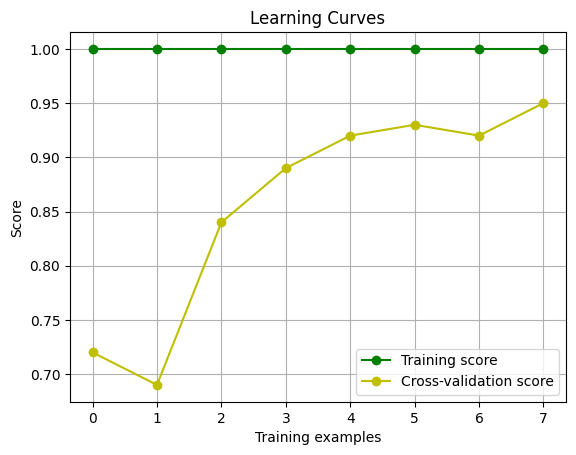

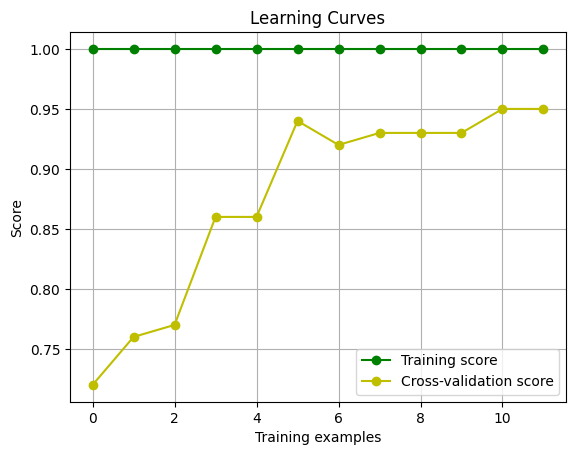

c:\users\my pc\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:1650: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 73 instead of 100.
  RuntimeWarning,


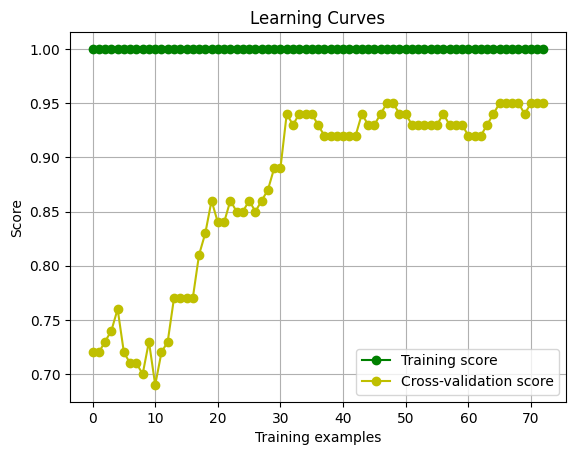

In [59]:
draw_learning_curves(X2, y2, gbc, 4)
draw_learning_curves(X2, y2, gbc, 8)
draw_learning_curves(X2, y2, gbc, 12)
draw_learning_curves(X2, y2, gbc, len(X2))